# Umwandlung einer DGL k-ter Ordnung in ein System von k DGL 1. Ordnung und Lösung in Python

#### Erstellt von R. Knaack, 14.05.2021 für die Vorlesung Höhere Mathematik 2 der ZHAW SoE
In diesem Tutorial geht es um die Lösung zweier Aufgaben, bei den Sie die Umwandlung einer DGL höherer Ordnung in eine vektorielle DGL 1. Ordnung üben können und die Schritte der Lösung in Python ausführen sollen.

# Aufgabe 1
(Bemerkung: Diese Aufgabe entspricht dem ersten Teil der Aufgaben 8.6 und 8.7 im Skript, erweitert sie allerdings um die Lösung in Python für das klass. Euler-Verfahren und das klass. vierstufige Runkge-Kutta Verfahren.)

Führen Sie die folgende lineare Differentialgleichungen auf ein System erster Ordnung zurück und berechnen Sie die Lösung in Python anschliessend mit dem klass. Euler-Verfahren und dem klass. Runge-Kutta Verfahren für $x\in[0,1]$ mit $h=0.1$:

$$y^{(4)}+1.1y'''-0.1y''-0.3y=\sin x+5$$ 

mit $y(0)=y''(0)=y'''(0)=0$ und $y'(0)=2$ 

## Lösung Aufgabe 1


### A) Umwandlung der DGL 4. Ordnung in ein vektorielles System von 4 DGL 1. Ordnung
Analog zum Vorgehen in Beispiel 8.9 und dem Rezept im Skript (Kap. 8.8.1). Versuchen Sie, die Schritte selbst durchzuführen, und klicken Sie anschliessend auf Details, um sich die Lösung anzeigen zu lassen.

+ ####    Schritt 1: Auflösen der DGL nach der höchsten Ableitung (hier: 4): 
<details>
$$y^{(4)}=\sin x+5-1.1y'''+0.1y''+0.3y$$

- #### Schritt 2: Neue Funktionen einführen bis zur höchsten Ableitung minus 1 (hier: 3):
<details>
$$\begin{eqnarray*}
z_{1}(x) & = & y(x)\\
z_{2}(x) & = & y'(x)\\
z_{3}(x) & = & y''(x)\\
z_{4}(x) & = & y'''(x)
\end{eqnarray*}$$

- #### Schritt 3: Neue Funktionen ableiten und y, y', y'', y''' in $z_4'(x)$ ersetzen:
<details>
$$\begin{eqnarray*}
z_{1}'(x) & = & y'(x)=z_{2}(x)\\
z_{2}'(x) & = & y''(x)=z_{3}(x)\\
z_{3}'(x) & = & y'''(x)=z_{4}(x)\\
z_{4}'(x) & = & y^{(4)}(x)=\sin x+5-1.1y'''+0.1y''+0.3y =  \sin x+5-1.1\cdot z_{4}(x)+0.1\cdot z_{3}(x)+0.3\cdot z_{1}(x)
\end{eqnarray*}$$

- #### Schritt 4: Aufschreiben des Anfangswertproblems in vektorieller Form
<details>
$$
\mathbf{z}'=\left(\begin{array}{c}
z_{1}'\\
z_{2}'\\
z_{3}'\\
z_{4}'
\end{array}\right)=\left(\begin{array}{c}
z_{2}\\
z_{3}\\
z_{4}\\
\sin x+5-1.1\cdot z_{4}+0.1\cdot z_{3}+0.3\cdot z_{1}
\end{array}\right)=\boldsymbol{f}(x,\mathbf{z})\ \textrm{und }\mathbf{z}(0)=\mathbf{z}^{(0)}=\left(\begin{array}{c}
0\\
2\\
0\\
0
\end{array}\right)
$$

### B) Numerische Lösung einer vektoriellen DGL 1. Ordnung 

Wir suchen jetzt also die Lösung 
$$\mathbf{z}(x)=\left(\begin{array}{c}
z_{1}\\
z_{2}\\
z_{3}\\
z_{4}
\end{array}\right)
$$

der obigen vektoriellen DGL 1. Ordnung mit der Anfangsbedingung

$$\mathbf{z}(0)=\mathbf{z}^{(0)}=\left(\begin{array}{c}
0\\
2\\
0\\
0
\end{array}\right)
$$

Die Lösung $y(x)$ der usprünglichen DGL 4. Ordnung entspricht dann der ersten Komponente des Vektors $\mathbf{z}(x)$, da wir ja $z_1(x)=y(x)$ definiert hatten.

Wir verwenden dazu das folgende Rezept:



#### Allgemeines Rezept für das Lösen eines Systems von k DGL 1. Ordnung (gemäss Skript, Kap. 8.8.2)

Ist ein Lösungs-Verfahren 
$$\begin{eqnarray*}
x_{i+1}	&=&	x_{i}+h \\
y_{i+1}	&=&	y_{i}+Steigung\cdot h
\end{eqnarray*}$$

für die eindimensionale Gleichung 
$$y'(x)=f\left(x,\,y(x)\right),\;y(x_{0})=y_{0}$$
definiert, so kann es völlig analog erweitert werden als 
$$\begin{eqnarray*}
x_{i}	&=&	x_{i}+h \\
\boldsymbol{y}^{(i+1)}	&=&	\boldsymbol{y}^{(i)}+Steigung\cdot h
\end{eqnarray*}$$
für ein System 
$$\boldsymbol{y}'=\boldsymbol{f}\left(x,\boldsymbol{y}(x)\right)\ \textrm{mit }\boldsymbol{y}(x_{0})=\boldsymbol{y}^{(0)},$$

(wobei wie üblich ein hochgestellter Index in Klammern $\boldsymbol{y}^{(i)}$ einen Vektor aus $\mathbb{R}^{n}$ nach der i-ten Iteration bezeichnet).

Dabei werden ersetzt:

- $y'$ durch den Vektor $\boldsymbol{y}'$ der Ableitungen der einzelnen Komponenten, 

- $f\left(x,y(x)\right)$ durch die vektorwertige Funktion $\boldsymbol{f}\left(x,\boldsymbol{y}(x)\right)$ und 

- die skalare Anfangsbedingung $y(x_{0})=y_{0}$ durch die Anfangsbedingung $\boldsymbol{y}(x_{0})=\boldsymbol{y}^{(0)}$ . 

Es ist dann also
$$
\boldsymbol{y}(x)=\left(\begin{array}{c}
y_{1}(x)\\
y_{2}(x)\\
\vdots\\
y_{n}(x)
\end{array}\right),\!\boldsymbol{y}'=\left(\begin{array}{c}
y'_{1}(x)\\
y'_{2}(x)\\
\vdots\\
y'_{n}(x)
\end{array}\right),\ \boldsymbol{f}\left(x,\boldsymbol{y}(x)\right)=\left(\begin{array}{c}
f_{1}\left(x,\boldsymbol{y}(x)\right)\\
f_{2}\left(x,\boldsymbol{y}(x)\right)\\
\vdots\\
f_{n}\left(x,\boldsymbol{y}(x)\right)
\end{array}\right),\ \boldsymbol{y}(x_{0})=\boldsymbol{y}^{(0)}=\left(\begin{array}{c}
y_{1}(x_{0})\\
y_{2}(x_{0})\\
\vdots\\
y_{n}(x_{0})
\end{array}\right).
$$

### C) Lösung für das klass. Euler Verfahren in Python

- Als einfachstes Verfahren wenden wir nun das klass. Euler Verfahren auf die Lösung der oben hergeleiteten vektoriellen DGL an:
<details>
$$
\mathbf{z}'=\left(\begin{array}{c}
z_{1}'\\
z_{2}'\\
z_{3}'\\
z_{4}'
\end{array}\right)=\left(\begin{array}{c}
z_{2}\\
z_{3}\\
z_{4}\\
\sin x+5-1.1\cdot z_{4}+0.1\cdot z_{3}+0.3\cdot z_{1}
\end{array}\right)=\boldsymbol{f}(x,\mathbf{z})\ \textrm{und }\mathbf{z}(0)=\mathbf{z}^{(0)}=\left(\begin{array}{c}
0\\
2\\
0\\
0
\end{array}\right)
$$

    für $x\in[0,1]$ und $h=0.1$ (also $n=\frac{b-a}{h}=10$).
   

 
- Die Definition des klass. Euler-Verfahrens für Vektoren lautet:
  $$\begin{eqnarray*}
    x_{i+1}	&=&	x_{i}+h \\
    \boldsymbol{z}^{(i+1)}	&=&	\boldsymbol{z}^{(i)}+\boldsymbol{f}(x_i,\mathbf{z}^{(i)})\cdot h
    \end{eqnarray*}
  $$

- Achtung: Der Vektor $\mathbf{z}$ hat 4 Zeilen, wir starten die Iteration mit $\mathbf{z}^{(0)}=\left(\begin{array}{c}
0\\
2\\
0\\
0
\end{array}\right).$

  Wir schreiben in Python jeden Iterationsschritt $\mathbf{z}^{(1)},...,\mathbf{z}^{(10)}$ als zusätzliche Spalte auf, d.h. wir haben schliesslich in Python eine (4 x 11) Matrix 
  
 $$\mathbf{z}=[\mathbf{z}^{(0)}, \mathbf{z}^{(1)}, ... ,\mathbf{z}^{(10)}]$$

- Wir definieren zuerst das Interval $[a,b]$, die Schrittweite $h$ bzw. die Anzahl Schritte $n=\frac{b-a}{h}$, die Lösungsvektoren bzw. -matrizen $\mathbf{x}$ und $\mathbf{z}$ und die Anfangswerte $x_0$ resp. $\mathbf{z}^{(0)}$:  
  

In [1]:
import numpy as np

a = 0.
b = 1.
h = 0.1
n = np.int((b-a)/h)
rows = 4

x = np.zeros(n+1)
z = np.zeros([rows,n+1])

x[0] = a
z[:,0] =np.array([0.,2.,0.,0.])

print('x= ',x)
print('z= ',z)

x=  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
z=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


- Wir definieren jetzt die vektorwertige Funktion $\boldsymbol{f}(x,\mathbf{z})$ 
<details>
$$
\boldsymbol{f}(x,\mathbf{z})=\left(\begin{array}{c}
z_{2}\\
z_{3}\\
z_{4}\\
\sin x+5-1.1\cdot z_{4}+0.1\cdot z_{3}+0.3\cdot z_{1}
\end{array}\right)
$$
  Achtung: wegen der Indexierung in Python gilt für die Zeilenelemente von $\mathbf{z}$: $z_1$=z[0], $z_2$=z[1] etc.


In [2]:
def f(x,z): return np.array([z[1], z[2], z[3], np.sin(x)+5-1.1*z[3]+0.1*z[2]+0.3*z[0]])
print(f(x[0],z[:,0]))

[2. 0. 0. 5.]


 
- Schliesslich folgt die Definition des klass. Euler-Verfahrens für Vektoren:
  $$\begin{eqnarray*}
    x_{i+1}	&=&	x_{i}+h \\
    \boldsymbol{z}^{(i+1)}	&=&	\boldsymbol{z}^{(i)}+\boldsymbol{f}(x_i,\mathbf{z}^{(i)})\cdot h
    \end{eqnarray*}
  $$

In [3]:
for i in range(0,n):
    x[i+1]=x[i]+h
    z[:,i+1]=z[:,i]+h*f(x[i],z[:,i])
    
    print(x[i+1])
    print(z[:,i+1])    

0.1
[0.2 2.  0.  0.5]
0.2
[0.4        2.         0.05       0.96098334]
0.30000000000000004
[0.6        2.005      0.14609833 1.38764211]
0.4
[0.8005     2.01960983 0.28486254 1.78401448]
0.5
[1.00246098 2.04809609 0.46326399 2.15357835]
0.6
[1.20727059 2.09442249 0.67862183 2.49933375]
0.7
[1.41671284 2.16228467 0.9285552  2.82387562]
0.7999999999999999
[1.63294131 2.25514019 1.21094276 3.12945801]
0.8999999999999999
[1.85845533 2.37623447 1.52388857 3.4180509 ]
0.9999999999999999
[2.09607877 2.52862332 1.86569366 3.69139054]


- Die gesuchte Lösung $y(x)$ der ursprünglichen DGL 
$$y^{(4)}+1.1y'''-0.1y''-0.3y=\sin x+5$$ 

  findet sich wegen $z_1(x)=y(x)$ in der ersten Komponenten von $\mathbf{z}$, analog gilt $z_2(x)=y'(x)$ etc.:

([<matplotlib.lines.Line2D at 0x7ff150c68670>,
 <matplotlib.legend.Legend at 0x7ff16041a310>)

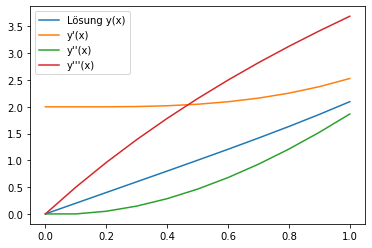

In [4]:
import matplotlib.pyplot as plt
plt.plot(x,z[0,:],x,z[1,:],x,z[2,:],x,z[3,:]), plt.legend(["Lösung y(x)", "y'(x)","y''(x)","y'''(x)"])   

### D) Lösung für das klass. vierstufige Runge-Kutta Verfahren in Python

- Für das klass. vierstufige Runge-Kutta Verfahrens gilt für Vektoren:
  $$\begin{eqnarray*}
   \boldsymbol{k}_{1}	&=&	f(x_{i},\,\boldsymbol{z}^{(i)}) \\
   \boldsymbol{k}_{2}	&=&	f(x_{i}+\frac{h}{2},\,\boldsymbol{z}^{(i)}+\frac{h}{2}\boldsymbol{k}_{1}) \\
   \boldsymbol{k}_{3}	&=&	f(x_{i}+\frac{h}{2},\,\boldsymbol{z}^{(i)}+\frac{h}{2}\boldsymbol{k}_{2}) \\
   \boldsymbol{k}_{4}	&=&	f(x_{i}+h,\,\boldsymbol{z}^{(i)}+h\boldsymbol{k}_{3}) \\
               x_{i+1}	&=&	x_{i}+h \\
   \boldsymbol{z}^{(i+1)}	&=&	\boldsymbol{z}^{(i)}+h\cdot\frac{1}{6}\left(\boldsymbol{k}_{1}+2\boldsymbol{k}_{2}+2\boldsymbol{k}_{3}+\boldsymbol{k}_{4}\right)
    \end{eqnarray*}
  $$
   

- Verwenden Sie nun das klass. vierstufige Runge-Kutta Verfahren zur Lösung der selben vektoriellen DGL. Plotten Sie Ihre neue Lösung.
<details>
$$
\mathbf{z}'=\left(\begin{array}{c}
z_{1}'\\
z_{2}'\\
z_{3}'\\
z_{4}'
\end{array}\right)=\left(\begin{array}{c}
z_{2}\\
z_{3}\\
z_{4}\\
\sin x+5-1.1\cdot z_{4}+0.1\cdot z_{3}+0.3\cdot z_{1}
\end{array}\right)=\boldsymbol{f}(x,\mathbf{z})\ \textrm{und }\mathbf{z}(0)=\mathbf{z}^{(0)}=\left(\begin{array}{c}
0\\
2\\
0\\
0
\end{array}\right)
$$

    für $x\in[0,1]$ und $h=0.1$ (also $n=\frac{b-a}{h}=10$).

In [5]:
# Hier folgt Ihr Code

import numpy as np
import matplotlib.pyplot as plt




# Aufgabe 2


Die Differentialgleichung eines Fadenpendels lautet für den Auslenkwinkel $\varphi=\varphi(t)$ unter Berücksichtigung des Luftwiderstandes 

$$\frac{d^2\varphi}{dt^2}+\frac{c}{m}\frac{d\varphi}{dt}+\frac{g}{l}\sin\varphi=0.$$ 

Dabei ist $c=0.16$ [Ns/m] der Dämpfungskoeffizient, $m=1$ [kg] die Masse, $l=1.2$ [m] die Länge des Fadens und $g=9.81$ [mkg/$\textrm{s}^{2}$] die Fallbeschleunigung. Die Anfangsbedingungen sind $\varphi(0)=\frac{\pi}{2}$, $\varphi'(0)=0$. 

Berechnen Sie die Lösung $\varphi(t)$ mittels des klassischen vierstufigen Runge-Kutta Verfahrens für $t\in[0,60]$ (in Sekunden) und Schrittweite $\Delta t=0.1$ und plotten Sie die Lösungskurve.  


## Lösung Aufgabe 2


### A) Umwandlung der DGL 2. Ordnung in ein vektorielles System von 2 DGL 1. Ordnung
Versuchen Sie, die Schritte selbst durchzuführen, und klicken Sie anschliessend auf Details, um sich die Lösung anzeigen zu lassen.

+ ####    Schritt 1: Auflösen der DGL nach der höchsten Ableitung (hier: 2): 
<details>
$$\frac{d^2\varphi}{dt^2}=-\frac{c}{m}\frac{d\varphi}{dt}-\frac{g}{l}\sin\varphi$$

- #### Schritt 2: Neue Funktionen einführen bis zur höchsten Ableitung minus 1 (hier: 1):
<details>
$$\begin{eqnarray*}
z_{1}(t) & = & \varphi(t)\\
z_{2}(t) & = & \frac{d\varphi}{dt}
\end{eqnarray*}$$

- #### Schritt 3: Neue Funktionen ableiten und $\varphi$, $\frac{d\varphi}{dt}$ ersetzen:
<details>
$$\begin{eqnarray*}
z_{1}'(x) & = & \frac{d\varphi}{dt}=z_{2}(x)\\
z_{2}'(x) & = & \frac{d^2\varphi}{dt^2} = -\frac{c}{m}\frac{d\varphi}{dt}-\frac{g}{l}\sin\varphi = -\frac{c}{m}\cdot z_2(t)-\frac{g}{l}\cdot \sin z_1(t)
\end{eqnarray*}$$

- #### Schritt 4: Aufschreiben des Anfangswertproblems in vektorieller Form
<details>
$$
\mathbf{z}'=\left(\begin{array}{c}
z_{1}'\\
z_{2}'
\end{array}\right)=\left(\begin{array}{c}
z_{2}\\
-\frac{c}{m}\cdot z_2(t)-\frac{g}{l}\cdot \sin z_1(t)
\end{array}\right)
=\boldsymbol{f}(t,\mathbf{z})\ \textrm{und }\mathbf{z}(0)=\mathbf{z}^{(0)}=\left(\begin{array}{c}
\pi/2\\
0
\end{array}\right)
$$

### B) Lösung für das klass. vierstufige Runge-Kutta Verfahren in Python

- Für das klass. vierstufige Runge-Kutta Verfahrens gilt für Vektoren:
  $$\begin{eqnarray*}
   \boldsymbol{k}_{1}	&=&	f(x_{i},\,\boldsymbol{z}^{(i)}) \\
   \boldsymbol{k}_{2}	&=&	f(x_{i}+\frac{h}{2},\,\boldsymbol{z}^{(i)}+\frac{h}{2}\boldsymbol{k}_{1}) \\
   \boldsymbol{k}_{3}	&=&	f(x_{i}+\frac{h}{2},\,\boldsymbol{z}^{(i)}+\frac{h}{2}\boldsymbol{k}_{2}) \\
   \boldsymbol{k}_{4}	&=&	f(x_{i}+h,\,\boldsymbol{z}^{(i)}+h\boldsymbol{k}_{3}) \\
               x_{i+1}	&=&	x_{i}+h \\
   \boldsymbol{z}^{(i+1)}	&=&	\boldsymbol{z}^{(i)}+h\cdot\frac{1}{6}\left(\boldsymbol{k}_{1}+2\boldsymbol{k}_{2}+2\boldsymbol{k}_{3}+\boldsymbol{k}_{4}\right)
    \end{eqnarray*}
  $$
   

- Verwenden Sie nun das klass. vierstufige Runge-Kutta Verfahren zur Lösung der selben vektoriellen DGL. Plotten Sie Ihre neue Lösung.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
    
def rk4(f,a,b,y0,h):
    n = np.int((b-a)/h)
    
    x = np.linspace(a,b,n+1)
    y = np.zeros((y0.size,n+1))
    
    # AB
    y[:,0] = y0
    
    for i in range(n):
        k1 = f(x[i],y[:,i])
        k2 = f(x[i]+h/2,y[:,i]+h/2*k1)
        k3 = f(x[i]+h/2,y[:,i]+h/2*k2)
        k4 = f(x[i]+h,y[:,i]+h*k3)
        
        y[:,i+1] = y[:,i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
        
    return (x,y)

In [7]:
def f(x,z):
    return np.array([z[1], (-16)*10**(-2)*z[1]-8.175*np.sin(z[0])], dtype=np.float64)

x,z = rk4(f, 0, 60, np.array([np.pi/2, 0], dtype=np.float64), 0.1)

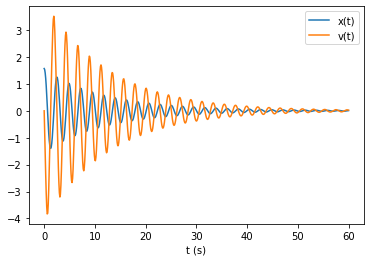

In [8]:
plt.plot(x,z[0,:], label='x(t)')
plt.plot(x,z[1,:], label='v(t)')
plt.xlabel('t (s)')
plt.legend()